In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp

# Premier tour dans SciPy des grands classiques du numérique

## Optimization

In [2]:
from scipy.optimize import minimize

Minimisez $f(x) = (x-3)^2$

In [3]:
def f(x):
    return (x-3)**2

res = minimize(f, x0=2)
res.x

array([2.99999999])

Relativement facile et si on s'attache à un domaine particulier:

Minimisez $f(x, y) = (x-1)^2 + (y-2.5)^2$ sous les contraintes

$$x-2y+2 \geq 0 $$
$$-x-2y+6 \geq 0$$
$$-x + 2y + 2 \geq 0$$
$$x \geq 0 $$
$$y \geq 0 $$

<p align="center">
  <img src="images/opt_reg.PNG" alt="drawing" width="300" align="center"/>
</p>

**A retenir:**
* La fonction `minimize` n'attend que des fonctions à un seul <u>argument vectoriel</u>
* Les constraintes doivent être décrites telles que $g_i(x) \geq 0$
* Les bornes globales doivent définir un rectangle (multi-D)

In [4]:
f = lambda x: (x[0] - 1)**2 + (x[1] - 2.5)**2
constraints = ({'type': 'ineq', 'fun': lambda x:  x[0] - 2 * x[1] + 2},
               {'type': 'ineq', 'fun': lambda x: -x[0] - 2 * x[1] + 6},
               {'type': 'ineq', 'fun': lambda x: -x[0] + 2 * x[1] + 2})
bounds = ((0, None), (0, None))
res = minimize(f, (2, 0), bounds=bounds, constraints=constraints)

In [5]:
res.x

array([1.4, 1.7])

Il existe plusieurs techniques d'optimisation et celle par défaut dépend de la combinaison des arguments donnés.

Pour plus d'information sur l'option `method` voir https://scipy.github.io/devdocs/tutorial/optimize.html ou bien

In [6]:
# minimize?

## Interpolation

Pour l'expérience nous allons partir de données générées et nous allons tenter de construire au mieux une interpolation de ce qui devraient des données expérimentales (par exemple)

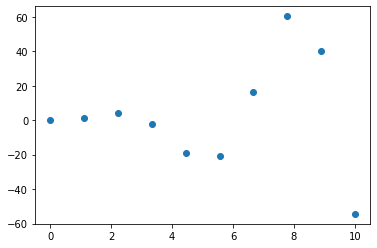

In [7]:
x = np.linspace(0, 10, 10)
f = lambda x : x**2 * np.sin(x)
y = f(x)
plt.scatter(x,y)

Il existe plusieurs méthodes d'interpolation dépendant d'abord de la dimension des données

In [8]:
from scipy.interpolate import interp1d

In [9]:
x_dense = np.linspace(0, 10, 100)

In [10]:
f1 = interp1d(x, y)

In [11]:
f3 = interp1d(x, y, kind='cubic')

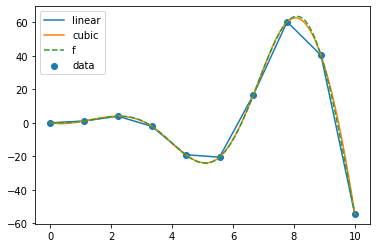

In [12]:
plt.plot(x_dense, f1(x_dense))
plt.plot(x_dense, f3(x_dense))
plt.plot(x_dense, f(x_dense), '--')
plt.scatter(x, y)
plt.legend(['linear', 'cubic', 'f', 'data'], loc='best')

## Curve Fitting

Une suite naturelle est maintenant de trouver une *meilleure* approximation d'un ensemble de points

In [13]:
x_data = np.linspace(0, 10, 10)
y_data = 3*x_data**2 + 2

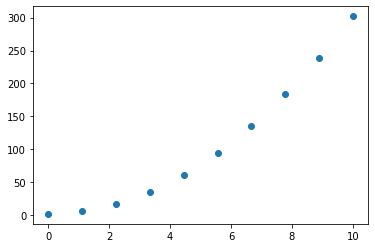

In [14]:
plt.scatter(x_data, y_data)

Nous allons vouloir trouver les paramètres $a$ et $b$ tels que la courbe $y = ax^2 + b$ approche *au mieux* les données.

In [15]:
from scipy.optimize import curve_fit

def func(x, a, b):
    return a*x**2 + b
popt, pcov = curve_fit(func, x_data, y_data, p0=(1,1))
popt, pcov

(array([3., 2.]),
 array([[ 4.13297331e-34, -1.45419433e-32],
        [-1.45419433e-32,  9.65872308e-31]]))

Nous avons dû fournir un point de départ et sans surprise nous retrouvons les coefficients qui ont servi à la génération des points.

Prenons désormais un exemple un peu physique: un ressort

Nous savons que l'équation de son mouvement est $y(t) = A\cos(\omega t+\phi)$. Nous cherchons ici à caractériser la fréquence d'oscillation naturelle $\omega$ à partir de données expérimentales.

In [16]:
t_data = np.array([ 
        0.        ,  0.34482759,  0.68965517,  1.03448276,  1.37931034,
        1.72413793,  2.06896552,  2.4137931 ,  2.75862069,  3.10344828,
        3.44827586,  3.79310345,  4.13793103,  4.48275862,  4.82758621,
        5.17241379,  5.51724138,  5.86206897,  6.20689655,  6.55172414,
        6.89655172,  7.24137931,  7.5862069 ,  7.93103448,  8.27586207,
        8.62068966,  8.96551724,  9.31034483,  9.65517241, 10.        ])
y_data = np.array([ 
        4.3303953 ,  1.61137995, -2.15418696, -3.90137249, -1.67259042,
        2.16884383,  3.86635998,  1.85194506, -1.8489224 , -3.96560495,
       -2.13385255,  1.59425817,  4.06145238,  1.89300594, -1.76870297,
       -4.26791226, -2.46874133,  1.37019912,  4.24945607,  2.27038039,
       -1.50299303, -3.46774049, -2.50845488,  1.20022052,  3.81633703,
        2.91511556, -1.24569189, -3.72716214, -2.54549857,  0.87262548])

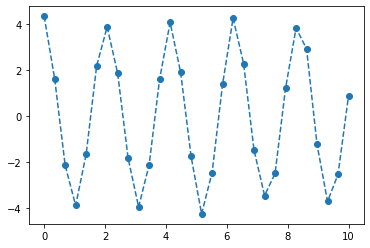

In [17]:
plt.plot(t_data,y_data,'o--')

On sait que $\omega = 2 \pi f$, $f=1/T$, 

et à l'oeil, on peut dire $T \approx 2$ secondes.

Le point d'initialisation de la méthode pourrait donc prendre quelque chose du genre:
* $\omega = 2 \pi (1/2) = \pi$
* $A=4$
* $\phi = 0$

In [18]:
from scipy.optimize import curve_fit

def func(x, A, w, phi):
    return A*np.cos(w*x+phi)

popt, pcov = curve_fit(func, t_data, y_data, p0=(4, np.pi, 0))
popt

array([3.94836218, 2.99899521, 0.10411349])

In [19]:
A, w, phi = popt

In [20]:
t = np.linspace(0, 10, 100)
y = func(t, A, w, phi)

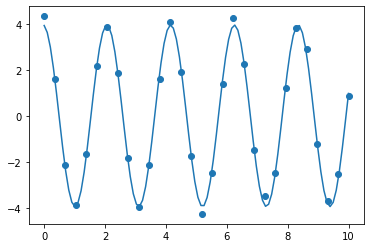

In [21]:
plt.scatter(t_data,y_data)
plt.plot(t,y)

Avec les paramètres:

In [22]:
popt

array([3.94836218, 2.99899521, 0.10411349])

Une estimation de l'erreur sur les paramètres peut être données par:

In [23]:
np.sqrt(np.diag(pcov))

array([0.05117448, 0.00430857, 0.02575703])

# Calcul différentiel

## La différentiation numérique

In [24]:
from scipy.misc import derivative

In [25]:
def f(x):
    return x**2 * np.sin(2*x) *np.exp(-x)
x = np.linspace(0, 1, 100)

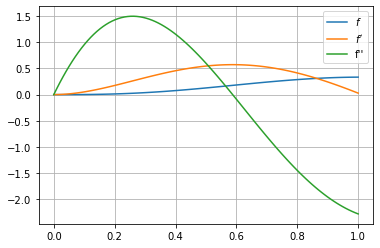

In [26]:
plt.plot(x, f(x))
plt.plot(x, derivative(f, x, dx=1e-6))
plt.plot(x, derivative(f, x, dx=1e-6, n=2))
plt.grid()
plt.legend(["$f$", "$f'$", "f''"], loc='best')

## L'intégration numérique

Soit l'intégrale *simple*

$$ \int_0^{1} x^2 \sin(2x) e^{-x} dx $$

In [27]:
from scipy.integrate import quad
integrand = lambda x: x**2 * np.sin(2*x) * np.exp(-x)
integral, integral_error = quad(integrand, 0, 1)

In [28]:
integral

0.14558175869954834

In [29]:
integral_error

1.6162822047366225e-15

Et maintenant une intégrale double

$$ \int_{0}^{1} \int_{-x}^{x^2} \sin(x+y^2) dy dx $$

In [30]:
from scipy.integrate import dblquad # il existe jusqu'à l'intégrale triple
integrand = lambda y, x: np.sin(x+y**2)
lwr_y = lambda x: -x     # les bornes internes peuvent bien entendu  
upr_y = lambda x: x**2   # dépendre de la variable d'intégration externe
integral, integral_error = dblquad(integrand, 0, 1, lwr_y, upr_y)

In [31]:
integral

0.5900903244088529

Ce qui est utile n'est que la valeur mais **aussi** l'erreur d'intégration

In [32]:
integral_error

2.0545915475811425e-14

## Équations différentielles ordinaires

## ODE du premier ordre

Ma source étant très orienté physique, voici l'équation d'une chute avec friction de l'air

$$ v' - \alpha v^2 + \beta = 0 \hspace{10mm} v(0) = 0$$

In [33]:
from scipy.integrate import odeint

Pour résoudre la précédente équation, il faut la ramener à une forme générale

$$ v'(t) = f(v,t) $$

NB: $v$ peut être vectoriel

In [34]:
def dvdt(v, t):
    return 3*v**2 - 5
v0 = 0

La résolution est numérique, pour un ensemble de points $t$ donnés

In [35]:
t = np.linspace(0, 1, 100)
sol = odeint(dvdt, v0, t)

In [36]:
v_sol = sol.T[0] # pour l'unique et seule première composante

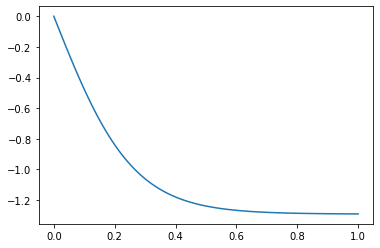

In [37]:
plt.plot(t, v_sol)

**ODE du premier ordre couplée**

$$ y_1' = y_1 + y_2^2 + 3x \hspace{10mm} y_1(0)=0$$
$$ y_2' = 3y_1 + y_2^3 - \cos(x) \hspace{10mm} y_2(0)=0$$

Pour la résoudre, il suffit de l'écrire sous une forme vectorielle avec $S=(y_1, y_2)$ et d'écrire comme pour précédemment $ S'(x) = f(S,x) $.

In [38]:
def dSdx(S, x):
    y1, y2 = S
    return [y1 + y2**2  + 3*x,
            3*y1 + y2**3 - np.cos(x)]
y1_0 = 0
y2_0 = 0
S_0 = (y1_0, y2_0)

In [39]:
x = np.linspace(0, 1, 100)
sol = odeint(dSdx, S_0, x)

In [40]:
y1_sol = sol.T[0]
y2_sol = sol.T[1]

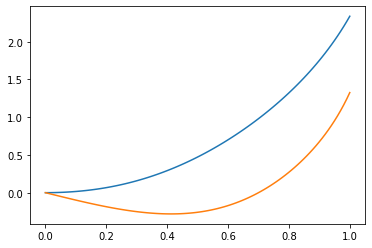

In [41]:
plt.plot(x, y1_sol)
plt.plot(x, y2_sol)

**ODE du deuxième ordre**

Soit l'équation du pendule

$$\theta'' - \sin(\theta) = 0$$

Pour résoudre cette équation avec SciPy, il faut la réécrire sous une forme $y'(x) = f(y,x)$.

Ceci peut se faire classiquement ainsi:

Posons $\omega = d\theta/dt$, alors:

$$d \omega / dt = \sin(\theta)$$
$$d \theta / dt = \omega $$

Let $y = (\theta, \omega)$

In [42]:
def dydt(y, t):
    theta, omega = y
    return [omega,
            np.sin(theta)]
theta0 = np.pi/4
omega0 = 0
y0 = (theta0, omega0)

In [43]:
t = np.linspace(0, 20, 100)
sol = odeint(dydt, y0, t)
theta, omega = sol.T

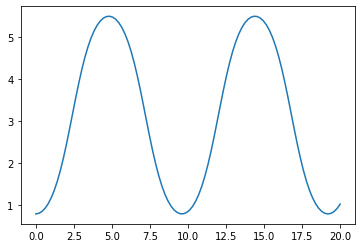

In [44]:
plt.plot(t, theta)
plt.show()

# Encore un peu d'algèbre linéaire
Extension de `numpy.linalg` (cf [doc](https://docs.scipy.org/doc/scipy/reference/linalg.html))

> `numpy.linalg` for more linear algebra functions. Note that although `scipy.linalg` imports most of them, identically named functions from `scipy.linalg` may offer more or slightly differing functionality.

In [45]:
from scipy import linalg as scipy_linalg
from numpy import linalg as numpy_linalg
scipy_list = set(dir(scipy_linalg))
numpy_list = set(dir(numpy_linalg))

In [46]:
numpy_list - scipy_list # les quelques fonctions qui ne sont que dans numpy.linalg

{'_umath_linalg',
 'cond',
 'lapack_lite',
 'linalg',
 'matrix_power',
 'matrix_rank',
 'multi_dot',
 'slogdet',
 'tensorinv',
 'tensorsolve'}

In [47]:
len(scipy_list - numpy_list) # les exclusivités de scipy

134

## Un problème simple

Une matrice triangulaire

$$ \begin{bmatrix} 3 & 0 & 0 & 0\\ 2 & 1 & 0 & 0 \\ 1 & 0 & 1 & 0 \\ 1 & 1 & 1 & 1 \end{bmatrix} {u} = \begin{bmatrix} 4\\2\\4\\2 \end{bmatrix} $$

In [48]:
# On lui donne une matrice carré pleine et 
# il extrait la partie triangulaire demandée
from scipy.linalg import solve_triangular
a = np.array([[3, 0, 0, 0],
              [2, 1, 0, 0],
              [1, 0, 1, 0],
              [1, 1, 1, 1]])
b = np.array([4, 2, 4, 2])
u = solve_triangular(a, b, lower=True)
u

array([ 1.33333333, -0.66666667,  2.66666667, -1.33333333])

## Problèmes aux valeurs propres

Le cas général fait partie de ce que sait faire `numpy`. `scipy` propose quelques raffinements pour des formes particulières de matrices.

In [49]:
from scipy.linalg import eigh_tridiagonal

$$ \begin{bmatrix} 3 & -1 & 0 & 0\\ -1 & 3 & -1 & 0 \\ 0 & -1 & 3 & -1 \\ 0 & 0 & -1 & 3 \end{bmatrix} u = \lambda u $$

In [50]:
d = 3*np.ones(4)
e = -1*np.ones(3)
l, u = eigh_tridiagonal(d, e)

In [51]:
A = np.diag(d) + np.diag(e, k=1) + np.diag(e, k=-1)
A

array([[ 3., -1.,  0.,  0.],
       [-1.,  3., -1.,  0.],
       [ 0., -1.,  3., -1.],
       [ 0.,  0., -1.,  3.]])

In [52]:
A@u.T[0]

array([0.51374315, 0.83125388, 0.83125388, 0.51374315])

In [53]:
l[0] * u.T[0]

array([0.51374315, 0.83125388, 0.83125388, 0.51374315])

De nombreux autres matrices particulières sont traitées: 
https://docs.scipy.org/doc/scipy/reference/linalg.html#special-matrices

## Décompositions de matrices

### Décomposition LU
Avec permutation $P$ : $A = PLU$

In [54]:
from scipy.linalg import lu
A = np.array([[2, 5, 8, 7], [5, 2, 2, 8], [7, 5, 6, 6], [5, 4, 4, 8]])
p, l, u = lu(A)

In [55]:
from scipy.linalg import norm
norm(A - p@l@u)

1.3322676295501878e-15

### Décomposition de Choleski
$A = CC^T$

In [56]:
from scipy.linalg import cholesky
A = np.array([[1,0.2],[0.2,1]])
C = cholesky(A, lower=True)

In [57]:
C

array([[1.       , 0.       ],
       [0.2      , 0.9797959]])

In [58]:
norm(A-C@C.T)

1.1102230246251565e-16

# Traitement du signal

In [59]:
from scipy import fftpack

Soit un signal bruité

In [60]:
np.random.seed(1234) # pour un peu de reproductibilité

time_step = 0.05
period = 5
T = 20

t = np.arange(0, T, time_step)

Premier signal

In [61]:
sig = (np.sin(2 * np.pi / period * t) + 0.5 * np.random.randn(t.size))

Un autre signal

In [62]:
# sig = 2.*np.sin(2*np.pi/period*t)+1.*np.sin(2*np.pi*2/period*t)+0.5*np.sin(2*np.pi*4/period*t)

Encore d'autres signaux plus *advanced*

In [63]:
# from scipy import signal
# sig =0.5+0.5*signal.square(2*np.pi/period*t)

Electricity demand from California from 2019-11-30 to 2019-12-30.
You can download data from [U.S. Energy Information Administration](https://www.eia.gov/beta/electricity/gridmonitor/dashboard/electric_overview/US48/US48)

In [64]:
import pandas as pd
import dateutil
df = pd.read_csv('./inputs/930-data-export.csv', delimiter=',')
df.rename(columns={'Demand (MWh)':'demand'}, inplace=True)

In [65]:
tzmapping = {'EST': dateutil.tz.gettz('America/Los_Angeles')}
df['hour'] = df['Timestamp (Hour Ending)'].apply(dateutil.parser.parse, tzinfos=tzmapping)
# df['hour'] = pd.to_datetime(df['Timestamp (Hour Ending)']).dt.tz_localize('America/Los_Angeles') # deprecated
#t = df["hour"]
#sig = df['demand']

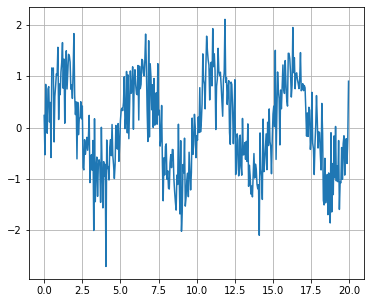

In [66]:
plt.figure(figsize=(6, 5))
plt.grid(True)
plt.plot(t, sig, label='Original signal')

FFT du signal

In [67]:
sig_fft = fftpack.fft(sig)

In [68]:
# Extraction des fréquenaces correspondantes
freq = fftpack.fftfreq(sig.size, d=time_step)

### Représentation avec  *shift* des fréquences

In [69]:
# sans cela, c'est quasi bon, mais l'ordre des fréquences 
# non strictement croissantes crée un trait liant min et max values
sig_fft_shifted = np.fft.fftshift(sig_fft)
freq_shifted = np.fft.fftshift(freq)

In [70]:
%matplotlib notebook

In [71]:
intensity_shifted = np.abs(sig_fft_shifted)

In [72]:
# Petit zoom calculé sur le pic
pos_mask = np.where(freq_shifted > 0)
intensity_masked = intensity_shifted[pos_mask]
max_intensity_index = intensity_masked.argmax()
freq_masked = freq_shifted[pos_mask]
peak_freq = freq_masked[max_intensity_index]

print(f"Peak freq={peak_freq}")

# On vérifie que c'est bien ce que l'on avait généré
assert np.allclose(peak_freq, 1./period)

zoom_index_min = max(max_intensity_index-5,0)
zoom_index_max = min(max_intensity_index+5,intensity_masked.size)

Peak freq=0.2


<IPython.core.display.Javascript object>


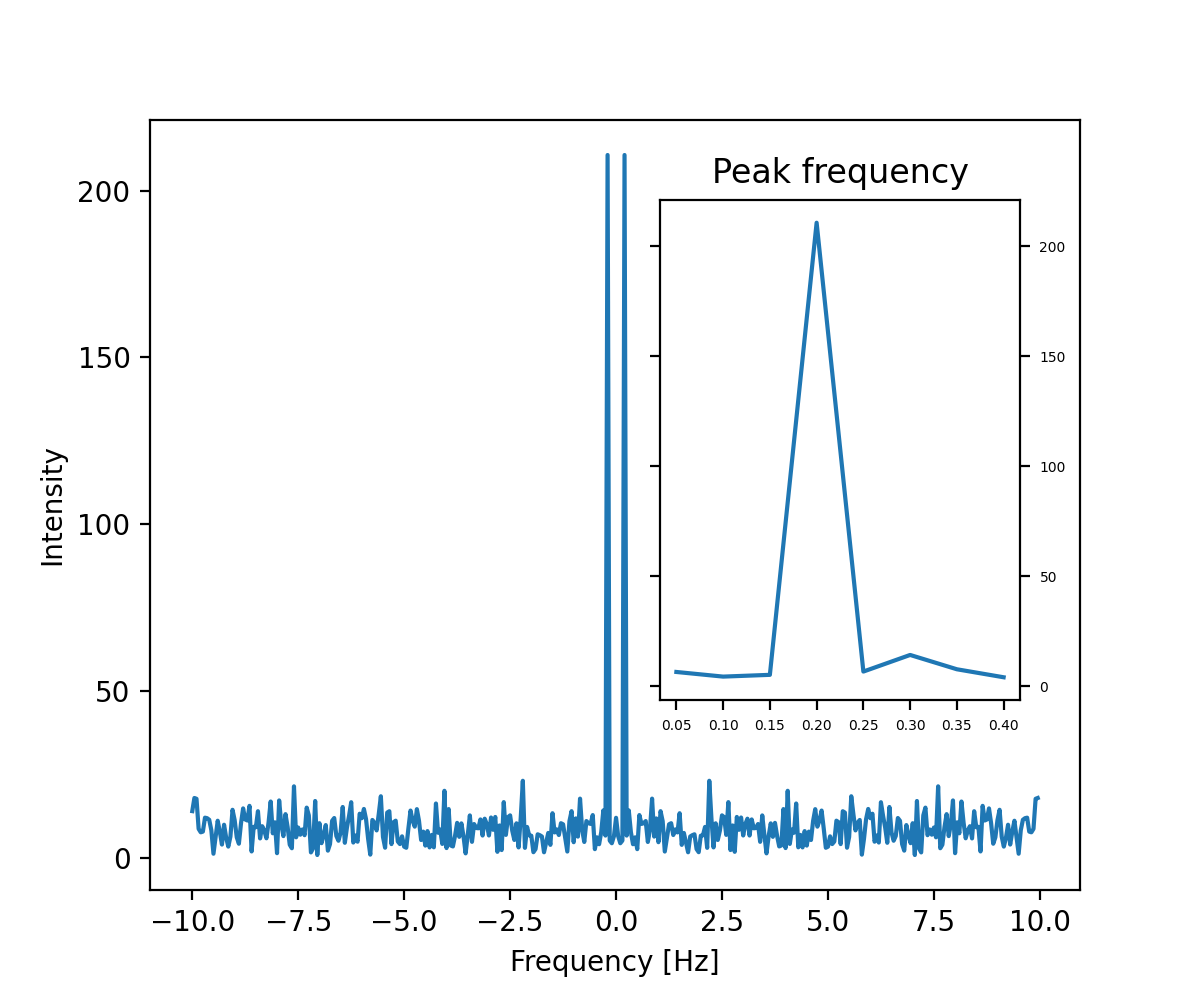

In [73]:
intensity_shifted=np.abs(sig_fft_shifted)

plt.figure(figsize=(6, 5))
plt.plot(freq_shifted, intensity_shifted)
plt.xlabel('Frequency [Hz]')
plt.ylabel('Intensity')


# Petit plot imbriqué pour le zoom
axes = plt.axes([0.55, 0.3, 0.3, 0.5])
plt.title('Peak frequency')
axes.yaxis.tick_right()
axes.yaxis.set_ticks_position('both')
axes.tick_params(axis='both', which='major', labelsize=5)
plt.plot(freq_masked[zoom_index_min:zoom_index_max], intensity_masked[zoom_index_min:zoom_index_max])

Nettoyage des fréquences parasites

<IPython.core.display.Javascript object>


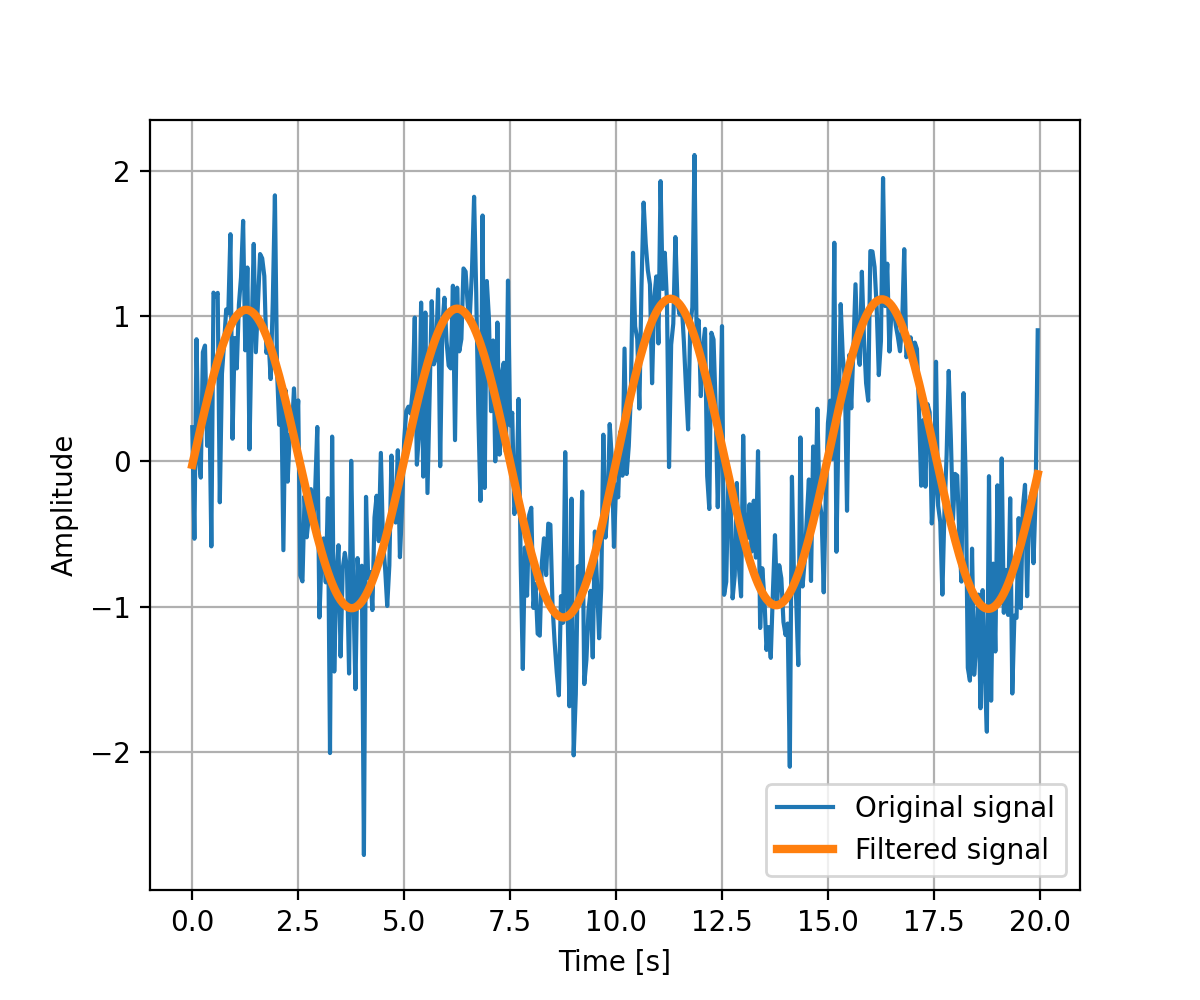

In [74]:
filtered_sig_fft = sig_fft.copy()
filtered_sig_fft[np.abs(freq) > peak_freq] = 0
filtered_sig = fftpack.ifft(filtered_sig_fft)
filtered_sig = np.real(filtered_sig) # on retire la partie imaginaire / erreur numérique

plt.figure(figsize=(6, 5))
plt.grid(True)
plt.plot(t, sig, label='Original signal')
plt.plot(t, filtered_sig, linewidth=3, label='Filtered signal')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')

plt.legend(loc='best')

Autre exemple intéressant [ici](https://notebook.community/blakeflei/IntroScientificPythonWithJupyter/08%20-%20Signal%20Processing%20-%20Scipy)

# A voir aussi
* [Lecture/écriture de données dans différents formats](https://docs.scipy.org/doc/scipy/reference/io.html)